In [1]:
import urllib
import pandas as pd
import numpy as np
import csv
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline
import fiona
import math
from __future__ import division

In [2]:
Year = {10:'10',11:'11',12:'12',13:'13',14:'14',15:'15',16:'16',17:'17'}
Month = ['01','02','03','04','05','06','07','08','09','10','11','12']
Part = {1:'upper', 2:'lower'}

year = Year[11] #Define the year
part = Part[2] #Define the part

In [3]:
# function that restructure the subway data
def restructure(df1):
    df1 = df1.T.reset_index()
    del df1['index']
    df1 = df1.T
    
    df1.columns = ['C/A', 'Unit', 'SCP', 'Date1', 'Time1', 'Type',
       'Entries1', 'Exits1', 'Date2', 'Time2', 'Type',
       'Entries2', 'Exits2', 'Date3', 'Time3', 'Type',
       'Entries3', 'Exits3', 'Date4', 'Time4', 'Type',
       'Entries4', 'Exits4', 'Date5', 'Time5', 'Type',
       'Entries5', 'Exits5', 'Date6', 'Time6', 'Type',
       'Entries6', 'Exits6', 'Date7', 'Time7', 'Type',
       'Entries7', 'Exits7', 'Date8', 'Time8', 'Type',
       'Entries8', 'Exits8']
    
    t1 = df1[['C/A', 'Unit', 'SCP', 'Date1', 'Time1','Entries1', 'Exits1']]
    t2 = df1[['C/A', 'Unit', 'SCP', 'Date2', 'Time2','Entries2', 'Exits2']]
    t3 = df1[['C/A', 'Unit', 'SCP', 'Date3', 'Time3','Entries3', 'Exits3']]
    t4 = df1[['C/A', 'Unit', 'SCP', 'Date4', 'Time4','Entries4', 'Exits4']]
    t5 = df1[['C/A', 'Unit', 'SCP', 'Date5', 'Time5','Entries5', 'Exits5']]
    t6 = df1[['C/A', 'Unit', 'SCP', 'Date6', 'Time6','Entries6', 'Exits6']]
    t7 = df1[['C/A', 'Unit', 'SCP', 'Date7', 'Time7','Entries7', 'Exits7']]
    t8 = df1[['C/A', 'Unit', 'SCP', 'Date8', 'Time8','Entries8', 'Exits8']]
    
    t1.columns = ['C/A', 'UNIT', 'SCP', 'DATE', 'TIME','ENTRIES', 'EXITS']
    t2.columns = ['C/A', 'UNIT', 'SCP', 'DATE', 'TIME','ENTRIES', 'EXITS']
    t3.columns = ['C/A', 'UNIT', 'SCP', 'DATE', 'TIME','ENTRIES', 'EXITS']
    t4.columns = ['C/A', 'UNIT', 'SCP', 'DATE', 'TIME','ENTRIES', 'EXITS']
    t5.columns = ['C/A', 'UNIT', 'SCP', 'DATE', 'TIME','ENTRIES', 'EXITS']
    t6.columns = ['C/A', 'UNIT', 'SCP', 'DATE', 'TIME','ENTRIES', 'EXITS']
    t7.columns = ['C/A', 'UNIT', 'SCP', 'DATE', 'TIME','ENTRIES', 'EXITS']
    t8.columns = ['C/A', 'UNIT', 'SCP', 'DATE', 'TIME','ENTRIES', 'EXITS']
    
    df1 = []
    
    total = pd.concat([t1,t2,t3,t4,t5,t6,t7,t8]).dropna(how='any')
    t1 = []
    t2 = []
    t3 = []
    t4 = []
    t5 = []
    t6 = []
    t7 = []
    t8 = []
    
    return total

## Download the data

In [4]:
# sample  =  ['01','01','01','01',
#             '02','02','02','02',
#             '03','03','03','03',
#             '04','04','04','04',
#             '05','05','05','05',
#             '06','06','06','06',
#             '07','07','07','07',
#             '08','08','08','08',
#             '09','09','09','09',
#             '10','10','10','10',
#             '11','11','11','11',
#             '12','12','12','12']

In [5]:
#Subway turnstile data
date = {
     17:['0107','0114','0121','0128',
         '0204','0211','0218','0225',
         '0304','0311','0318','0325',
         '0401','0408','0415','0422','0429',
         '0506','0513','0520','0527',
         '0603','0610','0617','0624',
         '0701','0708','0715','0722','0729',
         '0805','0812','0819','0826',
         '0902','0909','0916','0923','0930',
         '1007','1014','1021','1028',
         '1104','1111','1118','1125',
         '1202','1209','1216','1223','1230'],
     16:['0102','0109','0116','0123','0130',
         '0206','0213','0220','0227', 
         '0305','0312','0319','0326', 
         '0402','0409','0416','0423','0430', 
         '0507','0514','0521','0528', 
         '0604','0611','0618','0625', 
         '0702','0709','0716','0723','0730', 
         '0806','0813','0820','0827', 
         '0903','0910','0917','0924', 
         '1001','1008','1015','1022','1029', 
         '1105','1112','1119','1126', 
         '1203','1210','1217','1224','1231'],
     15:['0103','0110','0117','0124','0131',
         '0207','0214','0221','0228',
         '0307','0314','0321','0328',
         '0404','0411','0418','0425',
         '0502','0509','0516','0523','0530',
         '0606','0613','0620','0627',
         '0704','0711','0718','0725',
         '0801','0808','0815','0822','0829',
         '0905','0912','0919','0926',
         '1003','1010','1017','1024','1031',
         '1107','1114','1121','1128',
         '1205','1212','1219','1226'],
     14:['0104','0111','0118','0125',
         '0201','0208','0215','0222',
         '0301','0308','0315','0322','0329',
         '0405','0412','0419','0426',
         '0503','0510','0517','0524','0531',
         '0607','0614','0621','0628',
         '0705','0712','0719','0726',
         '0802','0809','0816','0823','0830',
         '0906','0913','0920','0927',
         '1004','1011','1018','1025',
         '1101','1108','1115','1122','1129',
         '1206','1213','1220','1227'],
     13:['0105','0112','0119','0126',
         '0202','0209','0216','0223',
         '0302','0309','0316','0323','0330',
         '0406','0413','0420','0427',
         '0504','0511','0518','0525',
         '0601','0608','0615','0622','0629',
         '0706','0713','0720','0727',
         '0803','0810','0817','0824','0831',
         '0907','0914','0921','0928',
         '1005','1012','1019','1026',
         '1102','1109','1116','1123','1130',
         '1207','1214','1221','1228'],
     12:['0107','0114','0121','0128',
         '0204','0211','0218','0225',
         '0303','0310','0317','0324','0331',
         '0407','0414','0421','0428',
         '0512','0519','0526',                  #0505 is removed due to incompatible format
         '0602','0609','0616','0623','0630',
         '0707','0721','0728',                  #0714 is removed due to unreadable data
         '0804','0811','0818','0825',
         '0901','0908','0915','0922','0929',
         '1006','1013','1020','1027',
         '1103','1110','1117','1124',
         '1201','1208','1215','1222','1229'], 
     11:['0101','0108','0115','0122','0129',
         '0205','0212','0219','0226',
         '0305','0312','0319','0326',
         '0402','0409','0416','0423','0430',
         '0507','0514','0521','0528',
         '0604','0611','0618','0625',
         '0702','0709','0716','0723','0730',
         '0806','0813','0820','0827',
         '0903','0910','0917','0924',
         '1001','1008','1015','1022','1029',
         '1105','1112','1119','1126',
         '1203','1210','1219','1224','1231'],
     10:['0508','0515','0522',
         '0605','0612','0619','0626',
         '0703','0710','0717','0724','0731',
         '0807','0814','0821','0828',
         '0904','0911','0918','0925',
         '1002','1009','1016','1023','1030',
         '1106','1113','1120','1127',
         '1204','1211','1218','1225']
         }

date_start = {17:'161231',16:'151226',15:'141227',14:'131228',13:'121229',12:'111231',11:'101225',10:'100505'}
date_end   = {17:'180106',16:'170107',15:'160102',14:'150103',13:'140104',12:'130105',11:'120107',10:'110101'}

In [6]:
# print('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+year+date[int(year)][i]+'.txt')

In [7]:
# print(date[int(year)][i])

In [8]:
#down load the turnstile data
df_start = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+date_start[int(year)]+'.txt')
df_end = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+date_end[int(year)]+'.txt')

if len(df_start.columns) == 43:
    df_start = restructure(df_start)
else:
    df_start.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DiVISION', 'DATE',
                        'TIME', 'DESCRIPTION', 'ENTRIES','EXITS']
    df_start = df_end[['C/A','UNIT','SCP', 'DATE','TIME','ENTRIES','EXITS']]

if len(df_end.columns) == 43:
        df_end = restructure(df_end)
else:
    df_end.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DiVISION', 'DATE',
                      'TIME', 'DESCRIPTION', 'ENTRIES','EXITS']
    df_end = df_end[['C/A','UNIT','SCP', 'DATE','TIME','ENTRIES','EXITS']]

df = df_start

if year == '10':
    start = 0
    end = len(date[int(year)])
else:
    if part =='upper':
        start = 0
        end = 28
    else:
        start = 25
        end = len(date[int(year)])

for i in range(start,end):
    df_sub = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+year+date[int(year)][i]+'.txt')
    if len(df_sub.columns) == 43:
        df_sub = restructure(df_sub)
    else:
        df_sub.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DiVISION', 'DATE',
                          'TIME', 'DESCRIPTION', 'ENTRIES','EXITS']
        df_sub = df_sub[['C/A','UNIT','SCP', 'DATE','TIME','ENTRIES','EXITS']]

    df = pd.concat([df,df_sub])
    print(str(i+1) + '/'+ str(end))

df = pd.concat([df,df_end])

26/53
27/53
28/53
29/53
30/53
31/53
32/53
33/53
34/53
35/53
36/53
37/53
38/53
39/53
40/53
41/53
42/53
43/53
44/53
45/53
46/53
47/53
48/53
49/53
50/53
51/53
52/53
53/53


In [9]:
# df = pd.read_csv('Turnstile_Usage_Data__2017.csv')

In [10]:
df.tail()

,C/A,UNIT,SCP,DATE,TIME,ENTRIES,EXITS
27726,TRAM2,R469,00-05-01,01-01-12,04:00:00,5554,43
27727,TRAM2,R469,00-05-01,01-02-12,08:00:00,5554,43
27728,TRAM2,R469,00-05-01,01-03-12,12:00:00,5554,43
27729,TRAM2,R469,00-05-01,01-04-12,20:00:00,5554,43
27730,TRAM2,R469,00-05-01,01-06-12,04:00:00,5554,43


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6448264 entries, 0 to 27730
Data columns (total 7 columns):
C/A        object
UNIT       object
SCP        object
DATE       object
TIME       object
ENTRIES    object
EXITS      object
dtypes: object(7)
memory usage: 393.6+ MB


In [12]:
df.head()

,C/A,UNIT,SCP,DATE,TIME,ENTRIES,EXITS
0,A002,R051,02-00-00,12-19-10,11:00:00,2980292,1029117
1,A002,R051,02-00-00,12-20-10,19:00:00,2982139,1029778
2,A002,R051,02-00-00,12-22-10,03:00:00,2984050,1030379
3,A002,R051,02-00-00,12-23-10,11:00:00,2985809,1031279
4,A002,R051,02-00-00,12-24-10,19:00:00,2987788,1031692


In [13]:
df_end.head()

,C/A,UNIT,SCP,DATE,TIME,ENTRIES,EXITS
0,A002,R051,02-00-00,01-01-12,11:00:00,3456963,1193438
1,A002,R051,02-00-00,01-02-12,11:00:00,3457457,1193662
2,A002,R051,02-00-00,01-03-12,19:00:00,3459385,1194323
3,A002,R051,02-00-00,01-05-12,03:00:00,3461276,1194831
4,A002,R051,02-00-00,01-06-12,07:00:00,3462965,1195433


In [14]:
df.shape

(6448264, 7)

In [15]:
# #rename the columns
# if (year == '17') | (year == '16') | (year == '15'):
#     df.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DiVISION', 'DATE',
#        'TIME', 'DESCRIPTION', 'ENTRIES','EXITS']

In [16]:
#Sorting by UNIT, SCP, DATE, TIME
df = df.sort_values(by=['UNIT','SCP','DATE','TIME'])

In [17]:
# #Taking relevant data
# df = df[['C/A','UNIT','SCP', 'DATE','TIME','ENTRIES','EXITS']]

In [18]:
#create the month and year column
df['MONTH'] = df.DATE.apply(lambda x: int(x[:2]))
df['YEAR'] = df.DATE.apply(lambda x: int(x[-2:]))

In [19]:
df = df[df.YEAR == int(year)]

## Define the Month

In [20]:
# Month = {1:'01',2:'02',3:'03',4:'04',5:'05',6:'06',7:'07',8:'08',9:'09',10:'10',11:'11',12:'12'}
# month = Month[1]

In [21]:
if year != '10':
    if part == 'upper':
        df = df[df.MONTH <7]
    else:
        df = df[df.MONTH >=7]
else:
    df = df[df.MONTH >=5]

In [22]:
# df_ = df[df.MONTH <7]

In [23]:
df.YEAR.unique()

array([11])

In [24]:
df.MONTH.unique()

array([ 7,  8,  9, 10, 11, 12])

In [25]:
df.shape

(5659230, 9)

In [26]:
# df['ENTRIES'] = df.ENTRIES.astype(int)
# df['EXITS'] = df.EXITS.astype(int)

In [27]:
# Getting values of SCP (turnstile) in a list
SCP = []
data_scp = df.groupby(['SCP'])
for name,group in data_scp:
    SCP.append(name)

In [28]:
# Function to calculate individual counts for each SCP
def get_individual_counts(df):
    """
    Calculates individual counts from cumulative counts
    
    Args: Dataframe for Each turnstile
    
    Returns: Dataframe with individual counts
    """
    entries = df.ENTRIES.tolist()
    exits = df.EXITS.tolist()
    
    if (len(entries)> 1) and (len(exits)> 1): # As some SCPs have only single values or too less values
                                                  # Need to resolve this issue
    
        entries_individual = []
        entries_individual.append(0)
        for i in range(1,len(entries)-1):
            entries_individual.append(entries[i]-entries[i-1])
        entries_individual.append(0)

        exits_individual = []
        exits_individual.append(0)
        for i in range(1,len(exits)-1):
            exits_individual.append(exits[i]-exits[i-1])
        exits_individual.append(0)

        ## checking for length of indivudual counts to be equal to length of entries column
        assert len(entries_individual) == len(entries)

        ## checking for length of indivudual counts to be equal to length of exits column
        assert len(exits_individual) == len(exits)

        ## Adding the individual counts back to the dataframe
        entries_se = pd.Series(entries_individual)
        exits_se = pd.Series(exits_individual)
        ## Creating new columns
        df['entries_new'] = entries_se.values
        df['exits_new'] = exits_se.values
    
    return df

In [29]:
# Processing for each SCP(turnstile) get individual counts
data_individual_counts = pd.DataFrame()
for scp in SCP:
    data_by_scp = data_scp.get_group(scp)
    data_individual_counts = data_individual_counts.append(get_individual_counts(data_by_scp))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
entries = data_individual_counts.drop(['exits_new'],axis=1)
exits = data_individual_counts.drop(['entries_new'],axis=1)

In [31]:
## Removing entries with negative counts
## remove entries with extremely large value
threshold = 8000
entries = entries[(entries.entries_new>=0)]
exits = exits[(exits.exits_new>=0)]
entries = entries[entries.entries_new<=threshold]
exits = exits[(exits.exits_new<=threshold)]

In [32]:
entries.head()

,C/A,DATE,ENTRIES,EXITS,MONTH,SCP,TIME,UNIT,YEAR,entries_new
2147,A060,07-01-11,4.95721e+06,1.0474e+07,7,00-00-00,01:00:00,R001,11,0.0
2147,A060,07-01-11,4.95725e+06,1.0474e+07,7,00-00-00,05:00:00,R001,11,38.0
2148,A060,07-01-11,4957710,10474459,7,00-00-00,09:00:00,R001,11,461.0
2148,A060,07-01-11,4.95806e+06,1.04753e+07,7,00-00-00,13:00:00,R001,11,353.0
2148,A060,07-01-11,4.95858e+06,1.04765e+07,7,00-00-00,17:00:00,R001,11,520.0


In [33]:
entries.shape

(5653714, 10)

In [34]:
exits.shape

(5653760, 10)

In [35]:
#clean the memory
df =[]
data_individual_counts = []
SCP = []

## Adding Coordinates

In [36]:
#read table matching each turnstile with coordintes
geo = pd.read_csv("https://raw.githubusercontent.com/chriswhong/nycturnstiles/master/geocoded.csv",header=None)
geo.columns = ["REMOTE","VALUES","NAME","Z","SRT","LAT","LONG"] #Made up these names but should change them

In [37]:
#adding coordinates to the table
entries = pd.merge(geo, entries, how="outer", left_on="REMOTE",right_on="UNIT")
exits = pd.merge(geo, exits, how="outer", left_on="REMOTE",right_on="UNIT")

In [38]:
entries.head()

,REMOTE,VALUES,NAME,Z,SRT,LAT,LONG,C/A,DATE,ENTRIES,EXITS,MONTH,SCP,TIME,UNIT,YEAR,entries_new
0,R470,X002,ELTINGVILLE PK,Z,SRT,40.544600,-74.164581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R544,PTH02,HARRISON,1,PTH,40.738879,-74.155533,PTH02,07-01-11,48462,2759,7.0,00-00-00,07:56:24,R544,11.0,173.0
2,R544,PTH02,HARRISON,1,PTH,40.738879,-74.155533,PTH02,07-01-11,48699,2761,7.0,00-00-00,12:08:24,R544,11.0,237.0
3,R544,PTH02,HARRISON,1,PTH,40.738879,-74.155533,PTH02,07-01-11,48767,2763,7.0,00-00-00,16:20:24,R544,11.0,68.0
4,R544,PTH02,HARRISON,1,PTH,40.738879,-74.155533,PTH02,07-01-11,48821,2772,7.0,00-00-00,20:32:24,R544,11.0,54.0


In [39]:
#remaining relevant columns
entries = entries[[u'entries_new',u'LAT',u'LONG',u'MONTH']]

exits = exits[[u'exits_new',u'LAT',u'LONG',u'MONTH']]

In [40]:
entries.head()

,entries_new,LAT,LONG,MONTH
0,NaN,40.544600,-74.164581,NaN
1,173.0,40.738879,-74.155533,7.0
2,237.0,40.738879,-74.155533,7.0
3,68.0,40.738879,-74.155533,7.0
4,54.0,40.738879,-74.155533,7.0


In [41]:
entries = entries.dropna()
exits = exits.dropna()

In [42]:
# entries['MONTH'] = entries.DATE.apply(lambda x: int(x[:2]))
# exits['MONTH'] = exits.DATE.apply(lambda x: int(x[:2]))

In [43]:
entries.shape

(11843122, 4)

In [44]:
exits.shape

(11843199, 4)

## Binning by zipcode

In [45]:
#Read zipcode shape file, set consistant crs
zipcode = gpd.read_file('ZIP_CODE/ZIP_CODE_040114.shp')
zipcode = zipcode[['ZIPCODE', 'geometry']]
#taxi_zones = gpd.read_file('taxi_zones/taxi_zones.shp')
crs = {'init' :'epsg:4326'}
#subway_gdf = gpd.GeoDataFrame(subway, geometry=geometry_, crs=crs)
zipcode = zipcode.to_crs(epsg=4326)

In [46]:
#create the coordinates columns fulfilling the geodataframe format
geometry_en = []
for i in range(math.floor(len(entries)/1000000)+1):
    start = 1000000 * i
    if i < math.floor(len(entries)/1000000):
        end = 1000000 * (i+1)
    else:
        end = len(entries)
    en_ = [Point(xy) for xy in zip(entries.iloc[start:end,:].LONG, entries.iloc[start:end,:].LAT)]
    geometry_en = geometry_en + en_
    print(str(i) + '/' + str(math.floor(len(entries)/1000000)))

0/11
1/11
2/11
3/11
4/11
5/11
6/11
7/11
8/11
9/11
10/11
11/11


In [47]:
#create the coordinates columns fulfilling the geodataframe format
geometry_ex = []
for i in range(math.floor(len(exits)/1000000)+1):
    start = 1000000 * i
    if i < math.floor(len(exits)/1000000):
        end = 1000000 * (i+1)
    else:
        end = len(exits)
    ex_ = [Point(xy) for xy in zip(exits.iloc[start:end,:].LONG, exits.iloc[start:end,:].LAT)]
    geometry_ex = geometry_ex + ex_
    print(str(i) + '/' + str(math.floor(len(exits)/1000000)))

0/11
1/11
2/11
3/11
4/11
5/11
6/11
7/11
8/11
9/11
10/11
11/11


In [48]:
# geometry_en = [Point(xy) for xy in zip(entries.LONG, entries.LAT)]
# geometry_ex = [Point(xy) for xy in zip(exits.LONG, exits.LAT)]
en_gdf = gpd.GeoDataFrame(entries, geometry=geometry_en, crs=crs)
ex_gdf = gpd.GeoDataFrame(exits, geometry=geometry_ex, crs=crs)

In [49]:
en_gdf = en_gdf[['entries_new','geometry','MONTH']]
ex_gdf = ex_gdf[['exits_new','geometry','MONTH']]

In [50]:
en_gdf.shape

(11843122, 3)

In [51]:
geometry_en = []
geometry_ex = []
entries = []
exits= []

In [52]:
tmp1 = pd.read_csv('SUBWAY_data/binning_template_en.csv')
tmp2 = pd.read_csv('SUBWAY_data/binning_template_ex.csv')

del tmp1['Unnamed: 0']
del tmp2['Unnamed: 0']

In [53]:
# binning the record to identify the zipcode for each entries coordinates
for i in range(math.floor(len(en_gdf)/1000000)+1):
    start = 1000000 * i
    if i < math.floor(len(en_gdf)/1000000):
        end = 1000000 * (i+1)
    else:
        end = len(en_gdf)
    test = en_gdf.iloc[start:end,:]
    test = gpd.sjoin(test, zipcode, how='right', op='within').reset_index()
    tmp1 = pd.concat([tmp1,test])
    print(str(i) + '/' + str(math.floor(len(en_gdf)/1000000)))

0/11
1/11
2/11
3/11
4/11
5/11
6/11
7/11
8/11
9/11
10/11
11/11


In [54]:
# binning the record to identify the zipcode for each exits coordinates
for i in range(math.floor(len(ex_gdf)/1000000)+1):
    start = 1000000 * i
    if i < math.floor(len(ex_gdf)/1000000):
        end = 1000000 * (i+1)
    else:
        end = len(ex_gdf)
    test = ex_gdf.iloc[start:end,:]
    test = gpd.sjoin(test, zipcode, how='right', op='within').reset_index()
    tmp2 = pd.concat([tmp2,test])
    print(str(i) + '/' + str(math.floor(len(ex_gdf)/1000000)))

0/11
1/11
2/11
3/11
4/11
5/11
6/11
7/11
8/11
9/11
10/11
11/11


In [55]:
en_gdf = tmp1.iloc[1:,:]
ex_gdf = tmp2.iloc[1:,:]

In [56]:
tmp1 = []
tmp2 = []

In [57]:
#en_gdf = gpd.sjoin(en_gdf, zipcode, how="right", op='within')
#ex_gdf = gpd.sjoin(ex_gdf, zipcode, how="right", op='within')

In [58]:
#group records by zipcode and month
en_gdf = en_gdf.groupby(['ZIPCODE','MONTH']).entries_new.sum().unstack().reset_index()
ex_gdf = ex_gdf.groupby(['ZIPCODE','MONTH']).exits_new.sum().unstack().reset_index()

In [59]:
en_gdf.head()

MONTH,ZIPCODE,7.0,8.0,9.0,10.0,11.0,12.0
0,00083,1772683.0,1757818.0,1800148.0,1920789.0,1900969.0,1960751.0
1,10001,25587213.0,24916108.0,25789181.0,26640689.0,26780970.0,28528547.0
2,10002,3934402.0,3823569.0,4107942.0,4255072.0,4253452.0,4267055.0
3,10003,19116958.0,18328012.0,20191342.0,21238782.0,20349284.0,20999366.0
4,10004,3803505.0,3797738.0,3771693.0,3842271.0,3560380.0,3598804.0


In [60]:
#create the customized column names
List = ['ZIPCODE']

if year != '10':
    if part == 'upper':
        start = 0
        end = 6
    elif part == 'lower':
        start = 6
        end = len(Month)
else:
    start = 4
    end = len(Month)
for i in range(start, end):
    tmp = [year + Month[i]]
    List = List + tmp

In [61]:
List

['ZIPCODE', '1107', '1108', '1109', '1110', '1111', '1112']

In [62]:
# en_gdf.columns = ['ZIPCODE', 1701, 1702,1703,1704]
# ex_gdf.columns = ['ZIPCODE', 1701, 1702,1703,1704]
en_gdf.columns = List
ex_gdf.columns = List

In [63]:
en_gdf.head()

,ZIPCODE,1107,1108,1109,1110,1111,1112
0,00083,1772683.0,1757818.0,1800148.0,1920789.0,1900969.0,1960751.0
1,10001,25587213.0,24916108.0,25789181.0,26640689.0,26780970.0,28528547.0
2,10002,3934402.0,3823569.0,4107942.0,4255072.0,4253452.0,4267055.0
3,10003,19116958.0,18328012.0,20191342.0,21238782.0,20349284.0,20999366.0
4,10004,3803505.0,3797738.0,3771693.0,3842271.0,3560380.0,3598804.0


In [64]:
ex_gdf.head()

,ZIPCODE,1107,1108,1109,1110,1111,1112
0,00083,1516203.0,1520060.0,1548600.0,1664232.0,1657067.0,1705705.0
1,10001,22954715.0,22289121.0,22793194.0,23540770.0,23319904.0,25026695.0
2,10002,3399499.0,3237807.0,3408611.0,3415805.0,3515471.0,3535673.0
3,10003,17937496.0,17252066.0,18769024.0,19630516.0,18526428.0,19380306.0
4,10004,3514206.0,3601985.0,3453467.0,3549047.0,3279851.0,3270542.0


In [65]:
en_gdf.shape

(126, 7)

In [66]:
ex_gdf.shape

(126, 7)

In [67]:
if year !='10':
    en_gdf.to_csv('SUBWAY_data/20' + year + '/subway'+ year + '_en_monthly_' + part + '.csv')
    ex_gdf.to_csv('SUBWAY_data/20' + year + '/subway'+ year + '_ex_monthly_' + part + '.csv')
else:
    en_gdf.to_csv('SUBWAY_data/20' + year + '/subway'+ year + '_en_monthly.csv')
    ex_gdf.to_csv('SUBWAY_data/20' + year + '/subway'+ year + '_ex_monthly.csv')

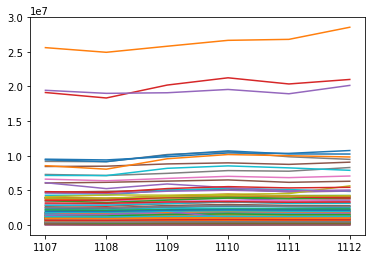

In [68]:
plt.plot(en_gdf.T.iloc[1:,:])

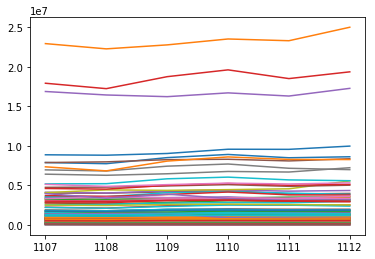

In [69]:
plt.plot(ex_gdf.T.iloc[1:,:])

## Merge the first half and second half year data for each year

In [78]:
# for i in range(11,18):

#     en1 = pd.read_csv('SUBWAY_data/20' + Year[i] + '/subway'+ Year[i] + '_en_monthly_upper.csv')
#     en2 = pd.read_csv('SUBWAY_data/20' + Year[i] + '/subway'+ Year[i] + '_en_monthly_lower.csv')
#     ex1 = pd.read_csv('SUBWAY_data/20' + Year[i] + '/subway'+ Year[i] + '_ex_monthly_upper.csv')
#     ex2 = pd.read_csv('SUBWAY_data/20' + Year[i] + '/subway'+ Year[i] + '_ex_monthly_lower.csv')
#     del en1['Unnamed: 0']
#     del ex1['Unnamed: 0']
#     del en2['Unnamed: 0']
#     del ex2['Unnamed: 0']

#     total1 = pd.merge(en1, en2, how='outer', on='ZIPCODE')
#     total2 = pd.merge(ex1, ex2, how='outer', on='ZIPCODE')
#     total1.to_csv('SUBWAY_data/20' + Year[i] + '/subway'+ Year[i] + '_en_monthly.csv')
#     total2.to_csv('SUBWAY_data/20' + Year[i] + '/subway'+ Year[i] + '_ex_monthly.csv')

In [79]:
# total

In [80]:
# total.to_csv('SUBWAY_data/subway'+ year + '_en_monthly.csv')

## Merge the yearly data

In [81]:
# print('SUBWAY_data/subway' + Year[13] +'en_monthly.csv')

In [82]:
# #year = Year[16] #define the year
# df_en = pd.read_csv('SUBWAY_data/20'+ Year[10] + '/subway' + Year[10] +'_en_monthly.csv')
# df_ex = pd.read_csv('SUBWAY_data/20'+ Year[10] + '/subway' + Year[10] +'_ex_monthly.csv')
# del df_en['Unnamed: 0']
# del df_ex['Unnamed: 0']


# #merge from 2010 to 2015
# for i in range(11,18): #merge 09-17
#     next_en = pd.read_csv('SUBWAY_data/20' + Year[i] + '/subway'+ Year[i] +'_en_monthly.csv')
#     next_ex = pd.read_csv('SUBWAY_data/20' + Year[i] + '/subway'+ Year[i] +'_ex_monthly.csv')
#     del next_en['Unnamed: 0']
#     del next_ex['Unnamed: 0']
#     df_en = pd.merge(df_en, next_en,how='outer', on = 'ZIPCODE')
#     df_ex = pd.merge(df_ex, next_ex,how='outer', on = 'ZIPCODE')

In [83]:
df_en

,ZIPCODE,1005,1006,1007,1008,1009,1010,1011,1012,1101,...,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712
0,83.0,1473521.0,1908840.0,1845411.0,1808755.0,1805434.0,1887417.0,1797434.0,1842607.0,1577487.0,...,1743359.0,1766044.0,1850521.0,1857065.0,1690199.0,1743834.0,1722062.0,1844098.0,1708810.0,1677951.0
1,10001.0,20271651.0,26578332.0,25997948.0,25593042.0,25557583.0,26831356.0,26325036.0,27888767.0,23966193.0,...,27209283.0,25590278.0,27181676.0,26709284.0,24070009.0,25069247.0,24432495.0,26688176.0,26196137.0,25856434.0
2,10002.0,3376334.0,4108449.0,3936075.0,3841939.0,4036725.0,4338971.0,4120848.0,4130903.0,4055065.0,...,4798505.0,4586987.0,4953861.0,4665016.0,4329300.0,4351712.0,4247199.0,4796150.0,4419516.0,4417758.0
3,10003.0,15539044.0,20155956.0,19506516.0,19070784.0,19831930.0,21455352.0,20085374.0,19937972.0,18184478.0,...,20078142.0,19606380.0,19908752.0,20127694.0,18485296.0,18833430.0,19503942.0,21208708.0,20054646.0,19592192.0
4,10004.0,3114592.0,3839943.0,3950758.0,3845680.0,3557365.0,3512222.0,3341781.0,3333091.0,3006437.0,...,3868733.0,3799131.0,4119467.0,4285975.0,4309724.0,4578736.0,4041083.0,4420073.0,3900569.0,3765133.0
5,10005.0,4151760.0,5187953.0,4956397.0,4932883.0,4936414.0,5115846.0,4781645.0,4692080.0,4622360.0,...,5281482.0,4696342.0,5191818.0,5225669.0,4528384.0,4915957.0,4568704.0,4995375.0,4609624.0,4210024.0
6,10006.0,726900.0,896416.0,851066.0,849314.0,825658.0,820624.0,794960.0,800836.0,683072.0,...,871672.0,874172.0,925332.0,922454.0,871608.0,867390.0,856040.0,926460.0,883998.0,873458.0
7,10007.0,7770205.0,9674707.0,9117075.0,9176376.0,9874232.0,10318592.0,9447914.0,9008419.0,8273479.0,...,9317345.0,8752461.0,9527155.0,9014501.0,8123751.0,8608594.0,8680759.0,9454451.0,8634051.0,7937166.0
8,10009.0,952232.0,1199350.0,1111588.0,1104498.0,1171212.0,1190060.0,1182474.0,1170542.0,1209572.0,...,1293752.0,1202744.0,1130036.0,1219848.0,1142186.0,1129352.0,1191548.0,1276692.0,1181168.0,1150098.0
9,10010.0,3687040.0,4600295.0,4262475.0,4228594.0,4897759.0,5083667.0,4849545.0,4623967.0,4246599.0,...,5045893.0,4529916.0,4871382.0,4430439.0,3994396.0,4229921.0,4504473.0,4917522.0,4611231.0,4275306.0


In [84]:
df_ex

,ZIPCODE,1005,1006,1007,1008,1009,1010,1011,1012,1101,...,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712
0,83.0,1316318.0,1660480.0,1576807.0,1553151.0,1568312.0,1635855.0,1584449.0,1606128.0,1398355.0,...,1309547.0,1309986.0,1370598.0,1376169.0,1262876.0,1313589.0,1303112.0,1376622.0,1317253.0,1260955.0
1,10001.0,18295276.0,23575949.0,23189554.0,22766531.0,22683462.0,23756539.0,23290884.0,24392681.0,21112486.0,...,23463534.0,22278420.0,23359046.0,23474804.0,21547871.0,22494057.0,21730273.0,23616936.0,23395845.0,23222230.0
2,10002.0,2951848.0,3503078.0,3309284.0,3212121.0,3370505.0,3629746.0,3415417.0,3406342.0,3372137.0,...,3617040.0,3465838.0,3687011.0,3400079.0,3228198.0,3169244.0,3017086.0,3508958.0,3293013.0,3314793.0
3,10003.0,14952586.0,19127604.0,18580018.0,18077442.0,18770246.0,20305572.0,18500192.0,18582334.0,17165430.0,...,17123576.0,16681588.0,16980930.0,17234800.0,15718220.0,16141152.0,16902110.0,18313082.0,17100662.0,17120156.0
4,10004.0,2804776.0,3610383.0,3662534.0,3582992.0,3170408.0,3049272.0,2999183.0,3010189.0,2666213.0,...,3487868.0,3550151.0,3738438.0,3887298.0,3838122.0,4127791.0,3235178.0,3656455.0,3189241.0,3086762.0
5,10005.0,3648054.0,4505012.0,4159061.0,4112648.0,4148521.0,4277108.0,4002891.0,3902967.0,3874763.0,...,4357681.0,3920528.0,4321991.0,4291632.0,3732756.0,4031077.0,3688821.0,4040347.0,3722107.0,3376532.0
6,10006.0,347474.0,379892.0,369410.0,372410.0,351240.0,345638.0,346768.0,356128.0,316230.0,...,382620.0,398660.0,464844.0,495282.0,454024.0,430318.0,412354.0,438130.0,435424.0,439572.0
7,10007.0,6174955.0,7396194.0,6870822.0,7000668.0,7503371.0,7809770.0,7059454.0,6722651.0,6142779.0,...,6477194.0,6343823.0,6866332.0,6493757.0,5937151.0,6270985.0,6181366.0,6667283.0,6025339.0,5844458.0
8,10009.0,1022502.0,1325054.0,1222680.0,1209776.0,1269128.0,1305964.0,1310506.0,1309250.0,1351668.0,...,1358732.0,1256488.0,1175740.0,1281556.0,1199296.0,1188042.0,1244288.0,1355796.0,1257334.0,1275012.0
9,10010.0,3185261.0,3863360.0,3585386.0,3582645.0,4043892.0,4133714.0,3947612.0,3786628.0,3509905.0,...,3685620.0,3425584.0,3594910.0,3274823.0,3039726.0,3184045.0,3316538.0,3587303.0,3320647.0,3136211.0


In [85]:
# df_en.to_csv('SUBWAY_data/subway_en_monthly.csv')
# df_ex.to_csv('SUBWAY_data/subway_ex_monthly.csv')